In [ ]:
!pip install tensorflow_decision_forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [ ]:
training_file_path = '/content/drive/MyDrive/Colab Notebooks/house-prices-dataset/train.csv'
df = pd.read_csv(training_file_path)
df.info()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<ipython-input-9-680840bc676e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='blue', bins=100, hist_kws={'alpha': 0.4});


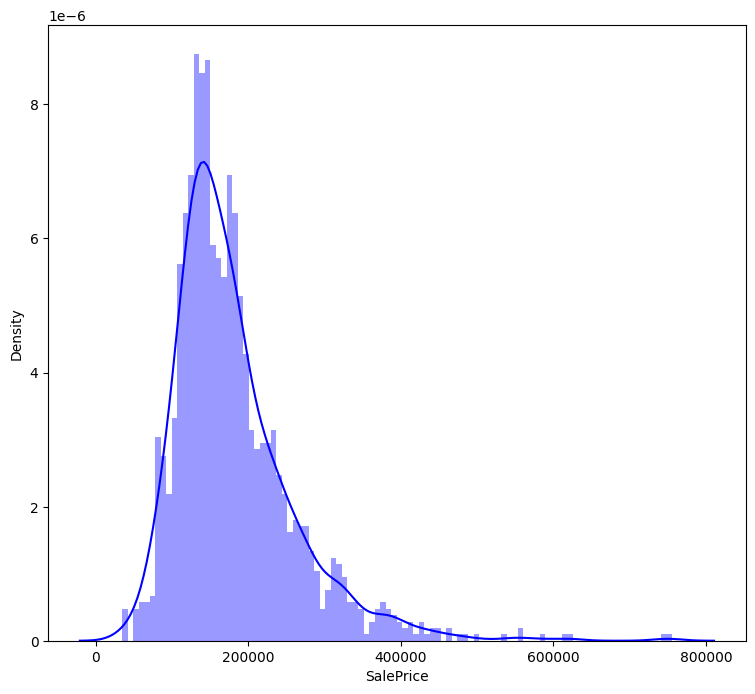

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='blue', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


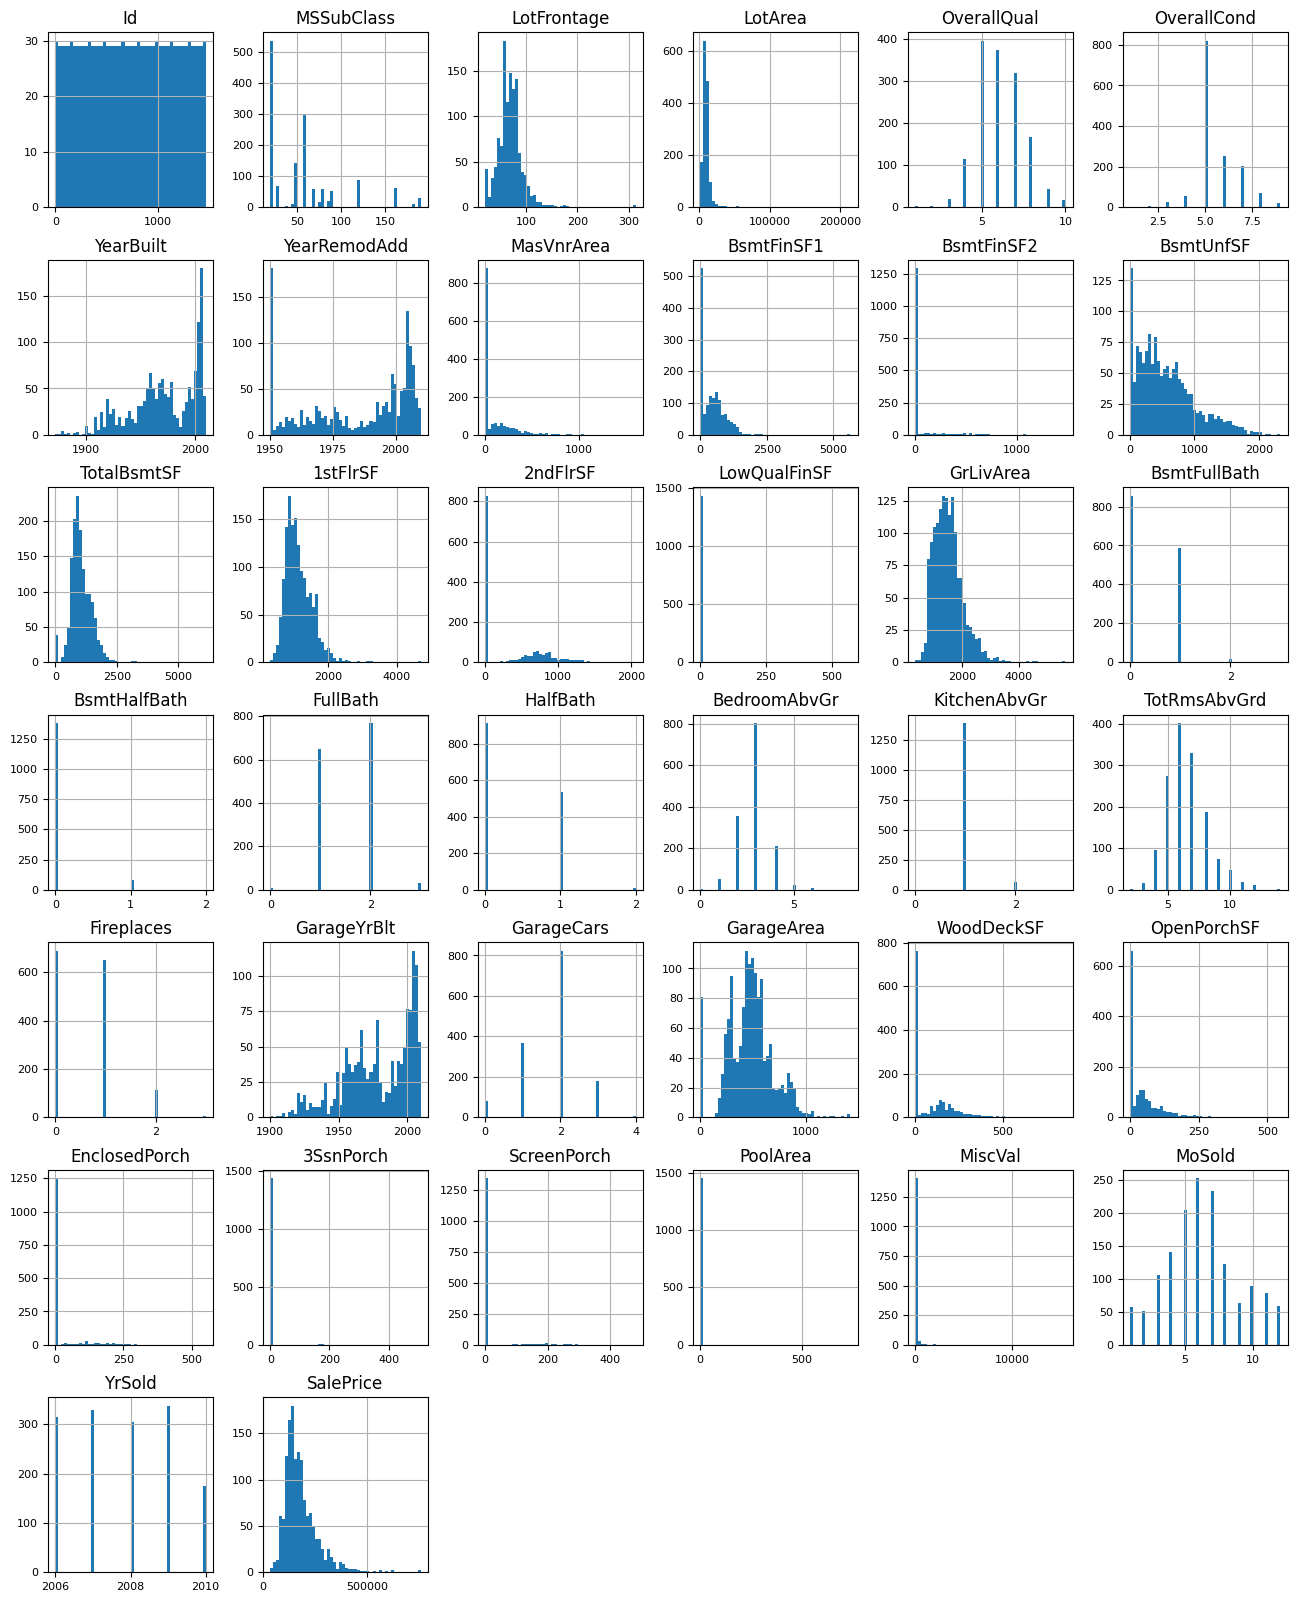

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1022 examples in training, 438 examples in testing.


In [ ]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmpkk43o3yj as temporary training directory


In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:12.652057. Found 1022 examples.
Training model...
Model trained in 0:00:03.103597
Compiling model...
Model compiled.


In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

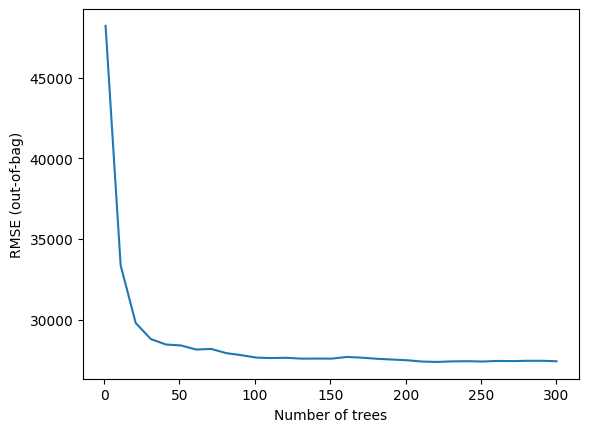

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1022, accuracy=None, loss=None, rmse=27413.707182774637, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - mse: 1051638144.0000
loss: 0.0000
mse: 1051638144.0000


In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #63), 105.0),
 ("ExterQual" (4; #22), 46.0),
 ("GrLivArea" (1; #38), 39.0),
 ("Neighborhood" (4; #60), 37.0),
 ("GarageCars" (1; #32), 22.0),
 ("GarageArea" (1; #31), 20.0),
 ("TotalBsmtSF" (1; #74), 11.0),
 ("KitchenQual" (4; #45), 8.0),
 ("YearBuilt" (1; #77), 6.0),
 ("BsmtQual" (4; #14), 3.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("GarageYrBlt" (1; #37), 1.0)]

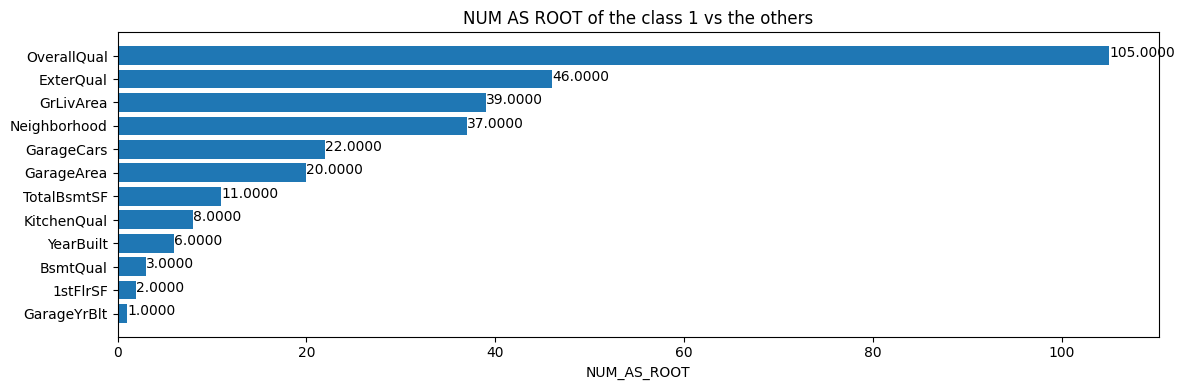

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [ ]:
test_file_path = "/content/drive/MyDrive/Colab Notebooks/house-prices-dataset/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core_inference.py", line 486, in run_step  *
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 2377, in predict_step  **
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filea2mh7h5v.py", line 232, in tf__call
        ag__.if_stmt(ag__.ld(self)._semantics is None, if_body_8, else_body_8, get_state_11, set_state_11, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_filea2mh7h5v.py", line 43, in else_body_8
        normalized_inputs = ag__.converted_call(ag__.ld(self)._build_normalized_inputs, (ag__.ld(inputs),), None, fscope)
    File "/tmp/__autograph_generated_file_qo175op.py", line 98, in tf___build_normalized_inputs
        semantic_inputs = ag__.converted_call(ag__.ld(tf_core).combine_tensors_and_semantics, (ag__.ld(inputs), ag__.ld(self)._semantics), None, fscope)
    File "/tmp/__autograph_generated_filerssg7xtu.py", line 34, in tf__combine_tensors_and_semantics
        ag__.if_stmt(ag__.not_(ag__.converted_call(ag__.converted_call(ag__.ld(set), (ag__.converted_call(ag__.ld(semantics).keys, (), None, fscope),), None, fscope).issubset, (ag__.converted_call(ag__.ld(inputs).keys, (), None, fscope),), None, fscope)), if_body, else_body, get_state, set_state, (), 0)
    File "/tmp/__autograph_generated_filerssg7xtu.py", line 30, in if_body
        raise ag__.converted_call(ag__.ld(ValueError), (ag__.converted_call('semantics is not a subset of inputs (inputs={} vs semantics={}).'.format, (ag__.converted_call(ag__.ld(inputs).keys, (), None, fscope), ag__.converted_call(ag__.ld(semantics).keys, (), None, fscope)), None, fscope),), None, fscope)

    ValueError: Exception encountered when calling layer 'random_forest_model' (type RandomForestModel).
    
    in user code:
    
        File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core_inference.py", line 672, in call  *
            normalized_inputs = self._build_normalized_inputs(inputs)
        File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/keras/core_inference.py", line 631, in _build_normalized_inputs  *
            semantic_inputs = tf_core.combine_tensors_and_semantics(
        File "/usr/local/lib/python3.10/dist-packages/tensorflow_decision_forests/tensorflow/core_inference.py", line 431, in combine_tensors_and_semantics  *
            raise ValueError("semantics is not a subset of inputs "
    
        ValueError: semantics is not a subset of inputs (inputs=dict_keys(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']) vs semantics=dict_keys(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'])).
    
    
    Call arguments received by layer 'random_forest_model' (type RandomForestModel):
      • inputs={'MSSubClass': 'tf.Tensor(shape=(None,), dtype=int64)', 'MSZoning': 'tf.Tensor(shape=(None,), dtype=string)', 'LotFrontage': 'tf.Tensor(shape=(None,), dtype=float32)', 'LotArea': 'tf.Tensor(shape=(None,), dtype=int64)', 'Street': 'tf.Tensor(shape=(None,), dtype=string)', 'Alley': 'tf.Tensor(shape=(None,), dtype=string)', 'LotShape': 'tf.Tensor(shape=(None,), dtype=string)', 'LandContour': 'tf.Tensor(shape=(None,), dtype=string)', 'Utilities': 'tf.Tensor(shape=(None,), dtype=string)', 'LotConfig': 'tf.Tensor(shape=(None,), dtype=string)', 'LandSlope': 'tf.Tensor(shape=(None,), dtype=string)', 'Neighborhood': 'tf.Tensor(shape=(None,), dtype=string)', 'Condition1': 'tf.Tensor(shape=(None,), dtype=string)', 'Condition2': 'tf.Tensor(shape=(None,), dtype=string)', 'BldgType': 'tf.Tensor(shape=(None,), dtype=string)', 'HouseStyle': 'tf.Tensor(shape=(None,), dtype=string)', 'OverallQual': 'tf.Tensor(shape=(None,), dtype=int64)', 'OverallCond': 'tf.Tensor(shape=(None,), dtype=int64)', 'YearBuilt': 'tf.Tensor(shape=(None,), dtype=int64)', 'YearRemodAdd': 'tf.Tensor(shape=(None,), dtype=int64)', 'RoofStyle': 'tf.Tensor(shape=(None,), dtype=string)', 'RoofMatl': 'tf.Tensor(shape=(None,), dtype=string)', 'Exterior1st': 'tf.Tensor(shape=(None,), dtype=string)', 'Exterior2nd': 'tf.Tensor(shape=(None,), dtype=string)', 'MasVnrType': 'tf.Tensor(shape=(None,), dtype=string)', 'MasVnrArea': 'tf.Tensor(shape=(None,), dtype=float32)', 'ExterQual': 'tf.Tensor(shape=(None,), dtype=string)', 'ExterCond': 'tf.Tensor(shape=(None,), dtype=string)', 'Foundation': 'tf.Tensor(shape=(None,), dtype=string)', 'BsmtQual': 'tf.Tensor(shape=(None,), dtype=string)', 'BsmtCond': 'tf.Tensor(shape=(None,), dtype=string)', 'BsmtExposure': 'tf.Tensor(shape=(None,), dtype=string)', 'BsmtFinType1': 'tf.Tensor(shape=(None,), dtype=string)', 'BsmtFinSF1': 'tf.Tensor(shape=(None,), dtype=float32)', 'BsmtFinType2': 'tf.Tensor(shape=(None,), dtype=string)', 'BsmtFinSF2': 'tf.Tensor(shape=(None,), dtype=float32)', 'BsmtUnfSF': 'tf.Tensor(shape=(None,), dtype=float32)', 'TotalBsmtSF': 'tf.Tensor(shape=(None,), dtype=float32)', 'Heating': 'tf.Tensor(shape=(None,), dtype=string)', 'HeatingQC': 'tf.Tensor(shape=(None,), dtype=string)', 'CentralAir': 'tf.Tensor(shape=(None,), dtype=string)', 'Electrical': 'tf.Tensor(shape=(None,), dtype=string)', '1stFlrSF': 'tf.Tensor(shape=(None,), dtype=int64)', '2ndFlrSF': 'tf.Tensor(shape=(None,), dtype=int64)', 'LowQualFinSF': 'tf.Tensor(shape=(None,), dtype=int64)', 'GrLivArea': 'tf.Tensor(shape=(None,), dtype=int64)', 'BsmtFullBath': 'tf.Tensor(shape=(None,), dtype=float32)', 'BsmtHalfBath': 'tf.Tensor(shape=(None,), dtype=float32)', 'FullBath': 'tf.Tensor(shape=(None,), dtype=int64)', 'HalfBath': 'tf.Tensor(shape=(None,), dtype=int64)', 'BedroomAbvGr': 'tf.Tensor(shape=(None,), dtype=int64)', 'KitchenAbvGr': 'tf.Tensor(shape=(None,), dtype=int64)', 'KitchenQual': 'tf.Tensor(shape=(None,), dtype=string)', 'TotRmsAbvGrd': 'tf.Tensor(shape=(None,), dtype=int64)', 'Functional': 'tf.Tensor(shape=(None,), dtype=string)', 'Fireplaces': 'tf.Tensor(shape=(None,), dtype=int64)', 'FireplaceQu': 'tf.Tensor(shape=(None,), dtype=string)', 'GarageType': 'tf.Tensor(shape=(None,), dtype=string)', 'GarageYrBlt': 'tf.Tensor(shape=(None,), dtype=float32)', 'GarageFinish': 'tf.Tensor(shape=(None,), dtype=string)', 'GarageCars': 'tf.Tensor(shape=(None,), dtype=float32)', 'GarageArea': 'tf.Tensor(shape=(None,), dtype=float32)', 'GarageQual': 'tf.Tensor(shape=(None,), dtype=string)', 'GarageCond': 'tf.Tensor(shape=(None,), dtype=string)', 'PavedDrive': 'tf.Tensor(shape=(None,), dtype=string)', 'WoodDeckSF': 'tf.Tensor(shape=(None,), dtype=int64)', 'OpenPorchSF': 'tf.Tensor(shape=(None,), dtype=int64)', 'EnclosedPorch': 'tf.Tensor(shape=(None,), dtype=int64)', '3SsnPorch': 'tf.Tensor(shape=(None,), dtype=int64)', 'ScreenPorch': 'tf.Tensor(shape=(None,), dtype=int64)', 'PoolArea': 'tf.Tensor(shape=(None,), dtype=int64)', 'PoolQC': 'tf.Tensor(shape=(None,), dtype=string)', 'Fence': 'tf.Tensor(shape=(None,), dtype=string)', 'MiscFeature': 'tf.Tensor(shape=(None,), dtype=string)', 'MiscVal': 'tf.Tensor(shape=(None,), dtype=int64)', 'MoSold': 'tf.Tensor(shape=(None,), dtype=int64)', 'YrSold': 'tf.Tensor(shape=(None,), dtype=int64)', 'SaleType': 'tf.Tensor(shape=(None,), dtype=string)', 'SaleCondition': 'tf.Tensor(shape=(None,), dtype=string)'}
      • training=False
